In [16]:
pip install seaborn


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv("nsl_kdd_dataset.csv")

print("Dataset Shape:", data.shape)
data.head()

Dataset Shape: (4430, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.666287,0.577740,0.248644,0.039280,0.151331,0.441503,0.996257,0.739421,0.042406,0.244036,...,0.223672,0.336817,0.546493,0.529456,0.591125,0.470904,0.539593,0.518795,0.616669,U2R
1,0.143014,0.729235,0.539983,0.485997,0.055436,0.291892,0.143944,0.858332,0.304242,0.901082,...,0.610218,0.755973,0.713821,0.688312,0.311610,0.246923,0.600187,0.153257,0.676371,normal
2,0.401813,0.101389,0.961499,0.367041,0.133935,0.567280,0.080431,0.875795,0.603445,0.235740,...,0.077247,0.519867,0.716784,0.535350,0.711465,0.861131,0.122357,0.578372,0.511315,DoS
3,0.887278,0.168009,0.660708,0.656651,0.614879,0.400250,0.853977,0.907267,0.469452,0.998242,...,0.054651,0.465111,0.425285,0.847906,0.124342,0.096678,0.026864,0.574663,0.226657,U2R
4,0.360109,0.274258,0.064115,0.353499,0.531030,0.539846,0.001381,0.897988,0.350272,0.597418,...,0.118315,0.551459,0.166497,0.943283,0.372073,0.051407,0.983987,0.456051,0.746222,DoS


In [19]:
data = data.drop_duplicates()
data["attack_flag"] = data["label"].apply(lambda x: 0 if x == "normal" else 1)
data["attack_flag"].value_counts()

,count
attack_flag,
1,3544
0,886


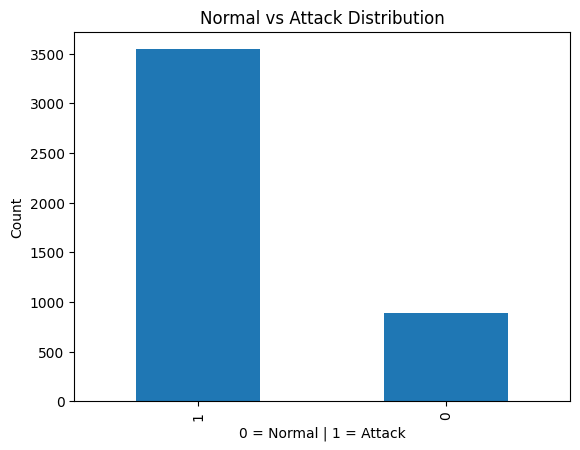

In [20]:
attack_counts = data["attack_flag"].value_counts()
attack_counts.plot(kind="bar")
plt.title("Normal vs Attack Distribution")
plt.xlabel("0 = Normal | 1 = Attack")
plt.ylabel("Count")
plt.show()

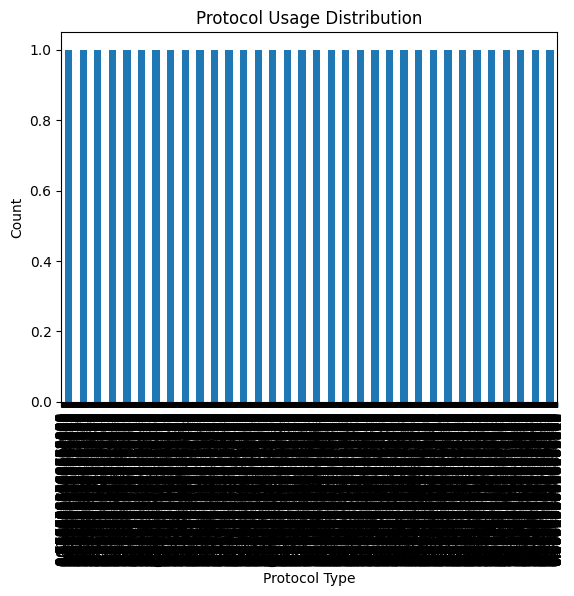

In [21]:
protocol_counts = data["protocol_type"].value_counts()
protocol_counts.plot(kind="bar")
plt.title("Protocol Usage Distribution")
plt.xlabel("Protocol Type")
plt.ylabel("Count")
plt.show()

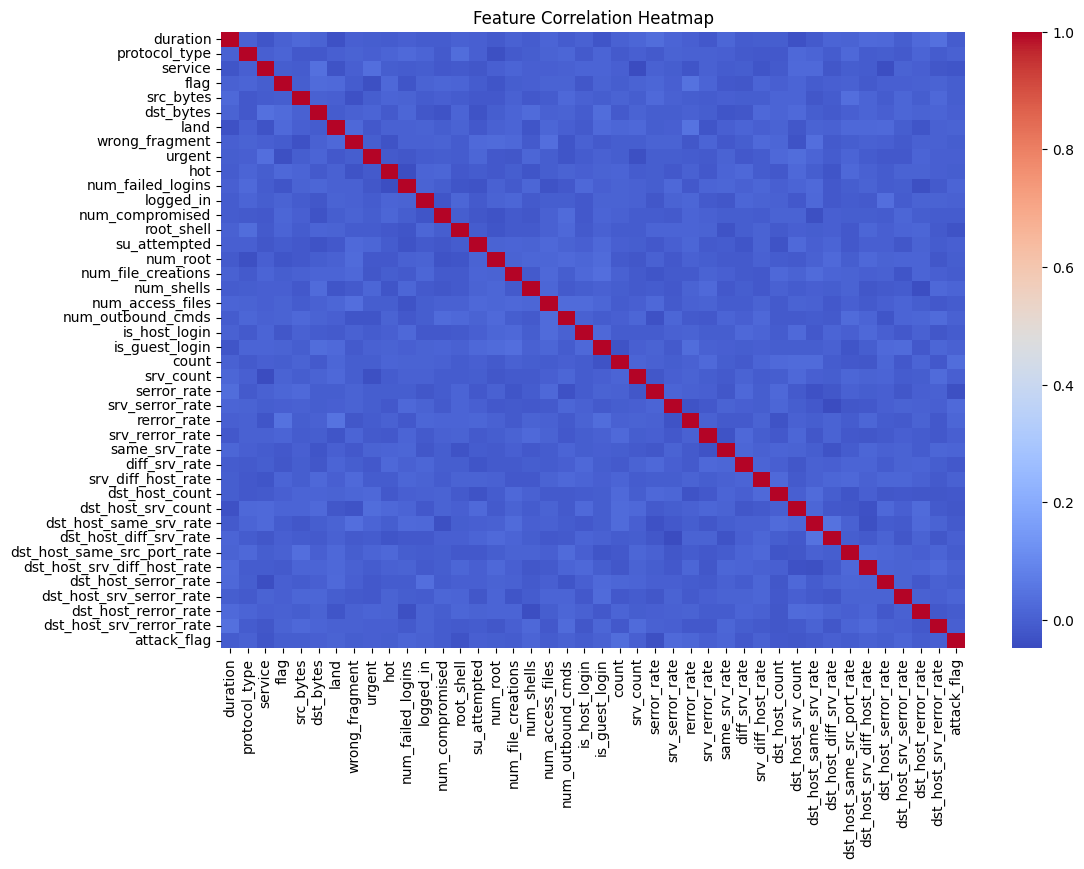

In [22]:
numeric_data = data.select_dtypes(include=["int64", "float64"])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_data.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [23]:
threshold = data["duration"].mean() + 2 * data["duration"].std()
data["anomaly_flag"] = data["duration"] > threshold
print("Potential anomalies detected:", data["anomaly_flag"].sum())

Potential anomalies detected: 0


Network Intrusion Detection Data Analysis

Objective
To analyze network traffic and identify intrusion patterns using statistical methods.

Key Findings
- X% of traffic is malicious.
- TCP is the most frequently used protocol.
- High duration connections may indicate suspicious behavior.
